In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection details
db_user = 'avnadmin'
db_pass = 'AVNS_cff1DGqoT2zZC61dVEA'
db_host = 'postgres-test-pranaygangadhar7-sql.i.aivencloud.com'
db_port = '11236'
db_name = 'defaultdb'

# Create SQLAlchemy engine with SSL mode required
engine = create_engine(
    f'postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}?sslmode=require'
)


In [10]:
# Run a test query from correct schema
df = pd.read_sql("SELECT * FROM hospital_project.patients LIMIT 5", con=engine)
df.head()


,patient_id,age,gender
0,P0001,79,Female
1,P0002,38,Male
2,P0003,22,Female
3,P0004,54,Female
4,P0005,5,Female


### 🧪 Step 1: Exploratory Data Analysis – Patients Table

This step involves basic data inspection and statistics for the `patients` table to understand the structure and contents.

- **Shape**: Check number of rows and columns.
- **Preview**: View the first few rows of patient data.
- **Summary Statistics**: Analyze numerical columns like `age`.
- **Missing Values**: Identify any null entries in the dataset.
- **Gender Distribution**: Understand the gender makeup of patients.


In [12]:
# Shape and preview
print("Shape:", df.shape)
df.head()

# Summary stats
df.describe()

# Null values
df.isnull().sum()

# Gender distribution
df['gender'].value_counts()


Shape: (5, 3)


gender
Female    4
Male      1
Name: count, dtype: int64

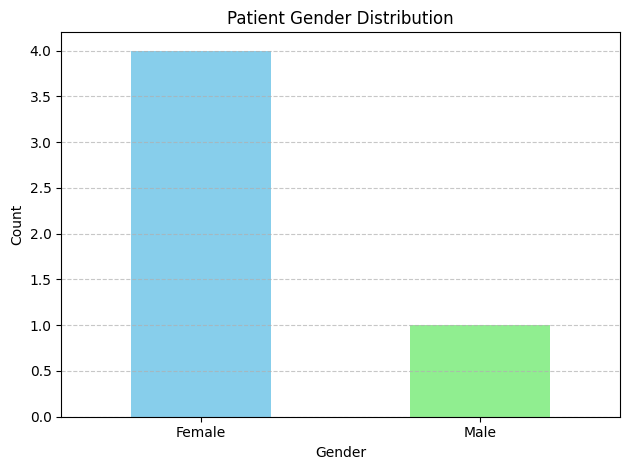

In [13]:
# Visual: Gender distribution
import matplotlib.pyplot as plt

df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Patient Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
wards_df = pd.read_sql("SELECT * FROM hospital_project.wards", con=engine)
wards_df.head()


,ward_type,max_beds,avg_cost_per_day
0,ICU,10,None
1,General,50,None
2,Maternity,20,None
3,Pediatrics,15,None
4,Surgery,25,None


In [16]:
print(wards_df.columns)


Index(['ward_type', 'max_beds', 'avg_cost_per_day'], dtype='object')


### Ward Type Distribution and Average Metrics

In this section, we analyze the different ward types available in the hospital and their associated metrics:

- **Ward Type Counts**: Shows how many wards are available per ward type (e.g., ICU, General, Maternity).
- **Average Max Beds**: Displays the average capacity (maximum number of beds) per ward type.
- **Average Cost per Day**: Highlights the average cost incurred per day for each ward type, which helps in cost-benefit and budgeting analysis.


In [17]:
# Ward types and average capacity
print("\nWard Type Counts:\n", wards_df['ward_type'].value_counts())

print("\nAverage Max Beds per Ward Type:\n", wards_df.groupby('ward_type')['max_beds'].mean())

print("\nAverage Cost per Day per Ward Type:\n", wards_df.groupby('ward_type')['avg_cost_per_day'].mean())



Ward Type Counts:
 ward_type
ICU            1
General        1
Maternity      1
Pediatrics     1
Surgery        1
Emergency      1
Psychiatric    1
Name: count, dtype: int64

Average Max Beds per Ward Type:
 ward_type
Emergency      12.0
General        50.0
ICU            10.0
Maternity      20.0
Pediatrics     15.0
Psychiatric    10.0
Surgery        25.0
Name: max_beds, dtype: float64

Average Cost per Day per Ward Type:
 ward_type
Emergency      NaN
General        NaN
ICU            NaN
Maternity      NaN
Pediatrics     NaN
Psychiatric    NaN
Surgery        NaN
Name: avg_cost_per_day, dtype: object


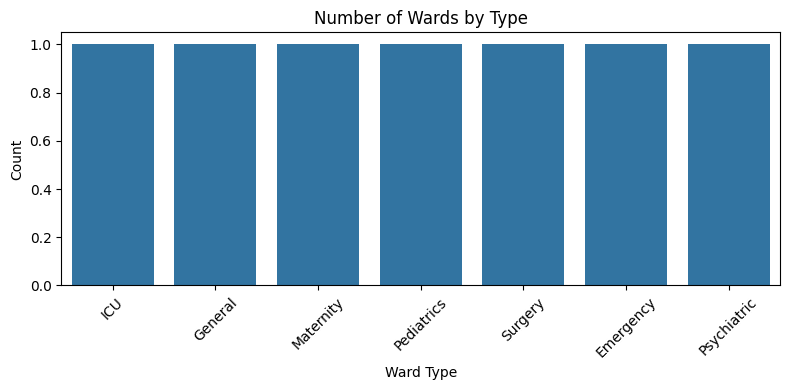

C:\Users\prana\AppData\Local\Temp\ipykernel_21380\772850288.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=wards_df, x='ward_type', y='max_beds', estimator='mean', ci=None)


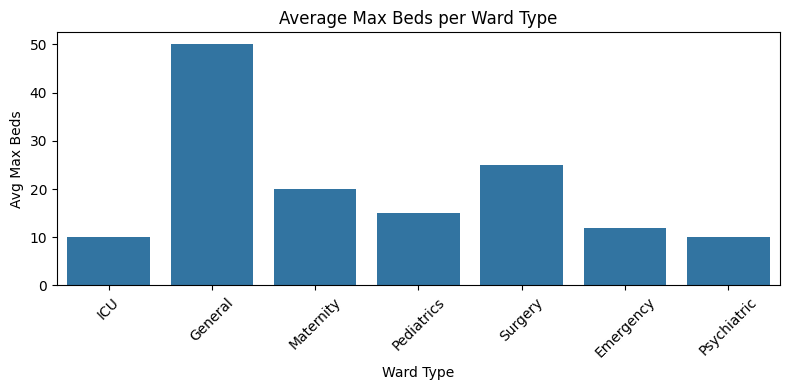

C:\Users\prana\AppData\Local\Temp\ipykernel_21380\772850288.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=wards_df, x='ward_type', y='avg_cost_per_day', estimator='mean', ci=None)


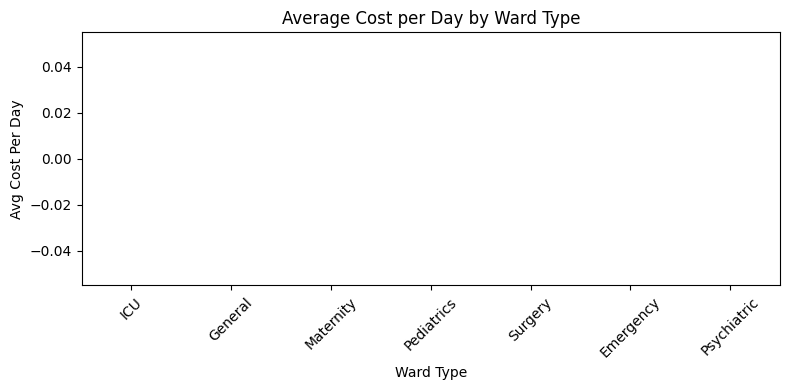

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Number of wards per type
plt.figure(figsize=(8, 4))
sns.countplot(data=wards_df, x='ward_type', order=wards_df['ward_type'].value_counts().index)
plt.title("Number of Wards by Type")
plt.xlabel("Ward Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Avg max beds per ward type
plt.figure(figsize=(8, 4))
sns.barplot(data=wards_df, x='ward_type', y='max_beds', estimator='mean', ci=None)
plt.title("Average Max Beds per Ward Type")
plt.xlabel("Ward Type")
plt.ylabel("Avg Max Beds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Avg cost per day per ward type
plt.figure(figsize=(8, 4))
sns.barplot(data=wards_df, x='ward_type', y='avg_cost_per_day', estimator='mean', ci=None)
plt.title("Average Cost per Day by Ward Type")
plt.xlabel("Ward Type")
plt.ylabel("Avg Cost Per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


## Diagnoses Table - Initial Exploration

We'll explore the common medical conditions diagnosed in the hospital, including:
- Frequency of each diagnosis
- Distribution of recovery vs death outcomes


In [20]:
diagnoses_df = pd.read_sql(
    "SELECT * FROM hospital_project.diagnoses",
    con=engine
)
diagnoses_df.head()


,diagnosis_id,diagnosis_name,category,severity_level
0,1,Pneumonia,None,None
1,2,Diabetes,None,None
2,3,Heart Disease,None,None
3,4,Fracture,None,None
4,5,Asthma,None,None


In [21]:
# Load diagnoses table
diagnoses_df = pd.read_sql("SELECT * FROM hospital_project.diagnoses", con=engine)


In [22]:
# View basic info
print("Diagnoses Shape:", diagnoses_df.shape)
diagnoses_df.head()


Diagnoses Shape: (10, 4)


,diagnosis_id,diagnosis_name,category,severity_level
0,1,Pneumonia,None,None
1,2,Diabetes,None,None
2,3,Heart Disease,None,None
3,4,Fracture,None,None
4,5,Asthma,None,None


### Diagnoses Table – EDA Summary

In this section, we explored the `diagnoses` table to understand the distribution and characteristics of various diagnoses recorded for patients:

- **Column Overview**: We listed all columns and verified that there are no missing (null) values.
- **Top 10 Diagnoses**: Displayed the most common diagnoses based on frequency.
- **Category Distribution**: Examined the spread of diagnoses across different medical categories (e.g., Cardiac, Neurological).
- **Severity Levels**: Analyzed how diagnoses are classified by severity (e.g., Mild, Moderate, Critical).

These insights help us understand the types of health issues most frequently encountered and the severity landscape of admitted patients.

> ℹ️ Note: Visualizations for `category` and `severity_level` were skipped due to low sample size in the dataset. These charts will be more meaningful when more diagnosis records are available.



In [24]:
print(diagnoses_df.columns.tolist())


['diagnosis_id', 'diagnosis_name', 'category', 'severity_level']


In [25]:
# Column overview and null check
print("Columns:", diagnoses_df.columns.tolist())
print("\nNull values:\n", diagnoses_df.isnull().sum())

# Top 10 diagnoses
print("\nTop 10 Diagnoses:\n", diagnoses_df['diagnosis_name'].value_counts().head(10))

# Diagnosis Category distribution
print("\nDiagnosis Categories:\n", diagnoses_df['category'].value_counts())

# Severity level distribution
print("\nSeverity Levels:\n", diagnoses_df['severity_level'].value_counts())


Columns: ['diagnosis_id', 'diagnosis_name', 'category', 'severity_level']

Null values:
 diagnosis_id       0
diagnosis_name     0
category          10
severity_level    10
dtype: int64

Top 10 Diagnoses:
 diagnosis_name
Pneumonia         1
Diabetes          1
Heart Disease     1
Fracture          1
Asthma            1
Covid-19          1
Hypertension      1
Infection         1
Cancer            1
Kidney Failure    1
Name: count, dtype: int64

Diagnosis Categories:
 Series([], Name: count, dtype: int64)

Severity Levels:
 Series([], Name: count, dtype: int64)


In [29]:
admissions_df = pd.read_sql("SELECT * FROM hospital_project.patient_admissions", con=engine)
admissions_df.head()


,admission_id,patient_id,diagnosis_name,admission_date,discharge_date,recovery_days,ward_type,outcome
0,1,P0087,Hypertension,2023-02-09,2023-03-09,28,Psychiatric,Recovered
1,2,P0056,Hypertension,2023-06-13,2023-07-08,25,Pediatrics,Recovered
2,3,P0061,Infection,2023-11-06,2023-11-25,19,Maternity,Recovered
3,4,P0003,Kidney Failure,2023-10-04,2023-10-21,17,Psychiatric,Recovered
4,5,P0051,Kidney Failure,2023-05-15,2023-05-21,6,Emergency,Recovered


# Column overview and nulls
print("Columns:", admissions_df.columns.tolist())
print("\nNull values:\n", admissions_df.isnull().sum())

# Recovery time summary
print("\nRecovery Time Summary:\n", admissions_df['recovery_days'].describe())

# Outcome distribution
print("\nPatient Outcomes:\n", admissions_df['outcome'].value_counts())

# Admissions per ward
print("\nAdmissions per Ward Type:\n", admissions_df['ward_type'].value_counts())


In [31]:
print(admissions_df.columns.tolist())


['admission_id', 'patient_id', 'diagnosis_name', 'admission_date', 'discharge_date', 'recovery_days', 'ward_type', 'outcome']


### Admissions Table – EDA

In this section, we analyze the hospital admissions data:
- **Column Overview**: Lists all available columns and checks for missing values.
- **Recovery Days Summary**: Shows min, max, mean, and standard deviation for recovery time.
- **Patient Outcomes**: Analyzes the frequency of outcomes like 'Recovered', 'Deceased', etc.
- **Ward Type Distribution**: Gives a count of how many admissions occurred in each ward type.


In [32]:
# Column overview and nulls
print("Columns:", admissions_df.columns.tolist())
print("\nNull values:\n", admissions_df.isnull().sum())

# Recovery time summary
print("\nRecovery Time Summary:\n", admissions_df['recovery_days'].describe())

# Outcome distribution
print("\nPatient Outcomes:\n", admissions_df['outcome'].value_counts())

# Admissions per ward
print("\nAdmissions per Ward Type:\n", admissions_df['ward_type'].value_counts())


Columns: ['admission_id', 'patient_id', 'diagnosis_name', 'admission_date', 'discharge_date', 'recovery_days', 'ward_type', 'outcome']

Null values:
 admission_id      0
patient_id        0
diagnosis_name    0
admission_date    0
discharge_date    0
recovery_days     0
ward_type         0
outcome           0
dtype: int64

Recovery Time Summary:
 count    8000.000000
mean       16.159250
std         8.392464
min         2.000000
25%         9.000000
50%        16.000000
75%        24.000000
max        30.000000
Name: recovery_days, dtype: float64

Patient Outcomes:
 outcome
Recovered    6432
Ongoing      1188
Deceased      380
Name: count, dtype: int64

Admissions per Ward Type:
 ward_type
Psychiatric    1162
Surgery        1162
Emergency      1154
Maternity      1135
Pediatrics     1132
General        1130
ICU            1125
Name: count, dtype: int64


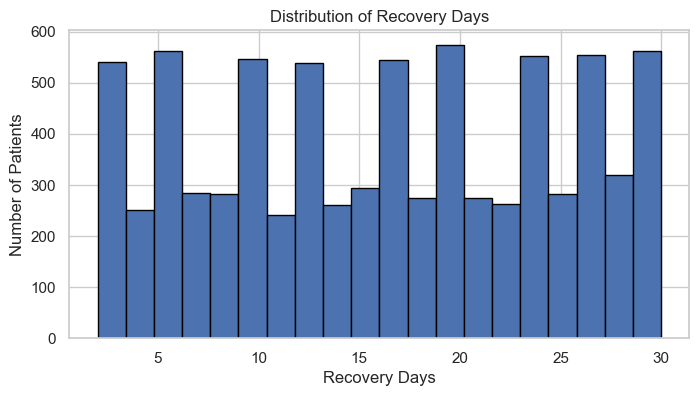

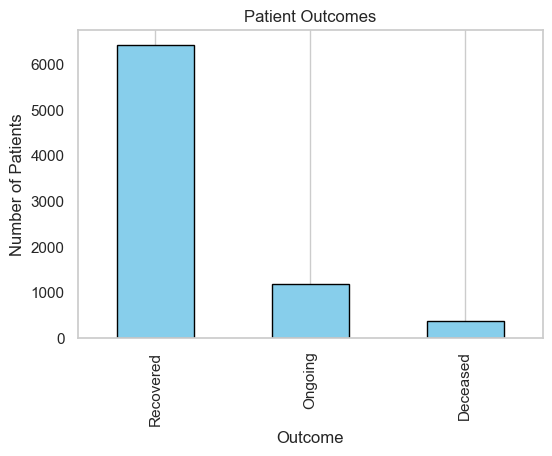

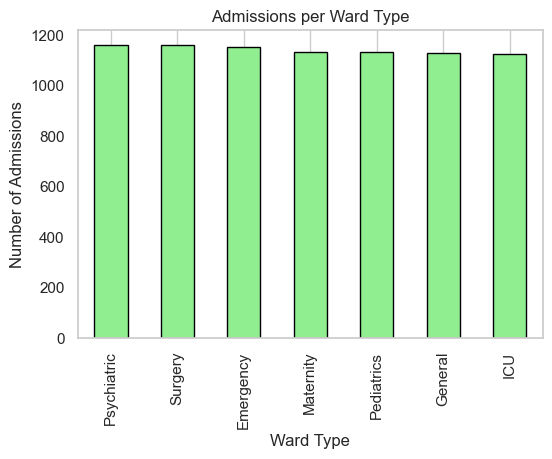

In [33]:
import matplotlib.pyplot as plt

# Plot 1: Recovery Days Distribution
plt.figure(figsize=(8, 4))
plt.hist(admissions_df['recovery_days'], bins=20, edgecolor='black')
plt.title('Distribution of Recovery Days')
plt.xlabel('Recovery Days')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

# Plot 2: Patient Outcome Distribution
plt.figure(figsize=(6, 4))
admissions_df['outcome'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Patient Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.show()

# Plot 3: Ward Usage Distribution
plt.figure(figsize=(6, 4))
admissions_df['ward_type'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Admissions per Ward Type')
plt.xlabel('Ward Type')
plt.ylabel('Number of Admissions')
plt.grid(axis='y')
plt.show()


In [34]:
billing_df = pd.read_sql("SELECT * FROM hospital_project.billing", con=engine)
billing_df.head()


,bill_id,admission_id,cost_per_day,recovery_days,total_cost,insurance_covered
0,1,1,450.0,28,12600.0,False
1,2,2,400.0,25,10000.0,True
2,3,3,300.0,19,5700.0,False
3,4,4,450.0,17,7650.0,False
4,5,5,600.0,6,3600.0,True


In [35]:
# Column check and nulls
print("Columns:", billing_df.columns.tolist())
print("\nNull values:\n", billing_df.isnull().sum())

# Cost statistics
print("\nCost per Day:\n", billing_df['cost_per_day'].describe())
print("\nTotal Cost:\n", billing_df['total_cost'].describe())

# Insurance breakdown
print("\nInsurance Coverage:\n", billing_df['insurance_covered'].value_counts())


Columns: ['bill_id', 'admission_id', 'cost_per_day', 'recovery_days', 'total_cost', 'insurance_covered']

Null values:
 bill_id              0
admission_id         0
cost_per_day         0
recovery_days        0
total_cost           0
insurance_covered    0
dtype: int64

Cost per Day:
 count    8000.000000
mean      536.181250
std       240.771626
min       250.000000
25%       300.000000
50%       450.000000
75%       800.000000
max       950.000000
Name: cost_per_day, dtype: float64

Total Cost:
 count     8000.000000
mean      8655.412500
std       6234.918853
min        500.000000
25%       3900.000000
50%       7200.000000
75%      12000.000000
max      28500.000000
Name: total_cost, dtype: float64

Insurance Coverage:
 insurance_covered
True     4025
False    3975
Name: count, dtype: int64


### Billing Table – EDA

This table contains financial information related to patient admissions:

- `cost_per_day`: Standard cost of staying in a ward
- `recovery_days`: Number of days patient stayed
- `total_cost`: Calculated as cost_per_day × recovery_days
- `insurance_covered`: Boolean indicating if insurance helped cover the bill

We’ll analyze:
- Cost distribution
- Insurance coverage patterns
- Correlation between recovery duration and cost


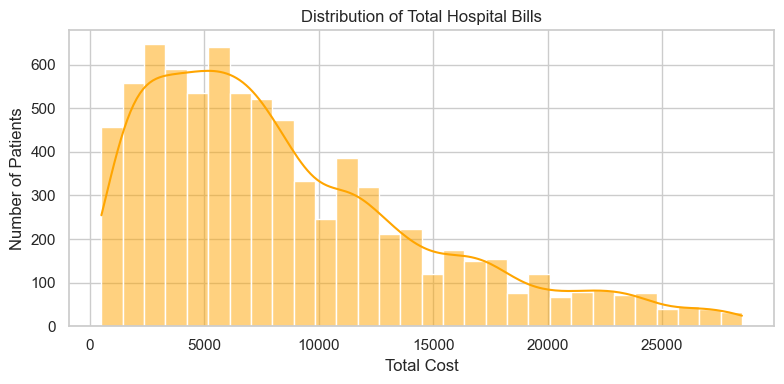

C:\Users\prana\AppData\Local\Temp\ipykernel_21380\3873110492.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=billing_df, x='insurance_covered', palette='Set2')


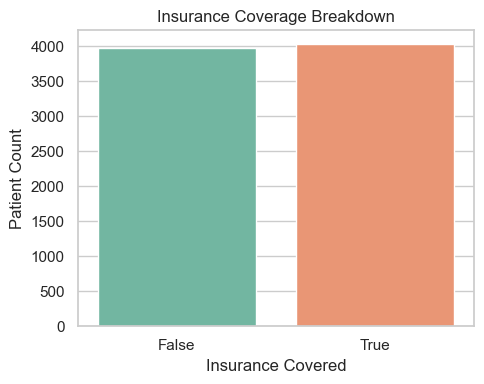

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of total cost
plt.figure(figsize=(8, 4))
sns.histplot(billing_df['total_cost'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Hospital Bills')
plt.xlabel('Total Cost')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Insurance coverage bar chart
plt.figure(figsize=(5, 4))
sns.countplot(data=billing_df, x='insurance_covered', palette='Set2')
plt.title('Insurance Coverage Breakdown')
plt.xlabel('Insurance Covered')
plt.ylabel('Patient Count')
plt.tight_layout()
plt.show()


In [37]:
# Join admissions + billing
billing_insight1 = pd.merge(admissions_df, billing_df, on='admission_id', how='inner')

# Group and calculate average total cost by ward
ward_costs = billing_insight1.groupby('ward_type')['total_cost'].mean().sort_values(ascending=False)
print("Average Total Cost by Ward Type:\n")
print(ward_costs)


Average Total Cost by Ward Type:

ward_type
ICU            15290.355556
Surgery        12758.003442
Emergency       9799.133449
Psychiatric     7222.461274
Pediatrics      6642.049470
Maternity       4820.352423
General         4005.530973
Name: total_cost, dtype: float64


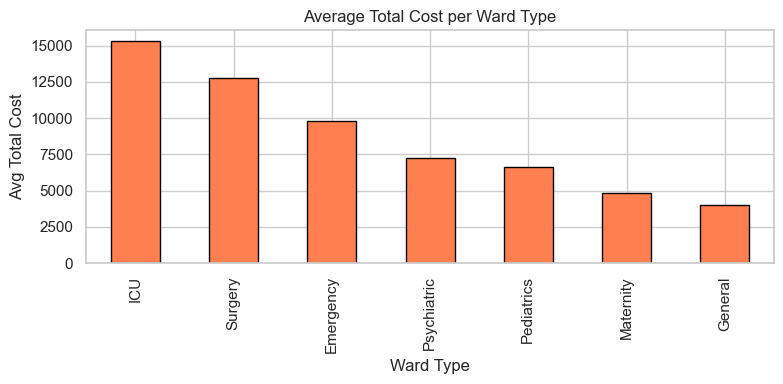

In [38]:
ward_costs.plot(kind='bar', color='coral', edgecolor='black', figsize=(8,4))
plt.title('Average Total Cost per Ward Type')
plt.xlabel('Ward Type')
plt.ylabel('Avg Total Cost')
plt.tight_layout()
plt.show()


In [41]:
pip install openpyxl xlsxwriter


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/250.9 kB 653.6 kB/s eta 0:00:01
   --------------------------- ------------ 174.1/250.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/169.4 kB ? eta -:--:--
   -------------------------------------- - 163.8/169.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 169.4/169.4 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# Assuming your engine is already created earlier
patients_df = pd.read_sql("SELECT * FROM hospital_project.patients", con=engine)
wards_df = pd.read_sql("SELECT * FROM hospital_project.wards", con=engine)
diagnoses_df = pd.read_sql("SELECT * FROM hospital_project.diagnoses", con=engine)
admissions_df = pd.read_sql("SELECT * FROM hospital_project.patient_admissions", con=engine)
billing_df = pd.read_sql("SELECT * FROM hospital_project.billing", con=engine)


PendingRollbackError: Can't reconnect until invalid transaction is rolled back.  Please rollback() fully before proceeding (Background on this error at: https://sqlalche.me/e/20/8s2b)

In [1]:
from sqlalchemy import create_engine
import pandas as pd

db_user = 'avnadmin'
db_pass = 'AVNS_cff1DGqoT2zZC61dVEA'
db_host = 'postgres-test-pranaygangadhar7-sql.i.aivencloud.com'
db_port = '11236'
db_name = 'defaultdb'

engine = create_engine(
    f'postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}?sslmode=require'
)


In [2]:
patients_df = pd.read_sql("SELECT * FROM hospital_project.patients", con=engine)
wards_df = pd.read_sql("SELECT * FROM hospital_project.wards", con=engine)
diagnoses_df = pd.read_sql("SELECT * FROM hospital_project.diagnoses", con=engine)
admissions_df = pd.read_sql("SELECT * FROM hospital_project.patient_admissions", con=engine)
billing_df = pd.read_sql("SELECT * FROM hospital_project.billing", con=engine)


In [3]:
import pandas as pd

# Export to Excel
with pd.ExcelWriter("hospital_project_data.xlsx", engine='xlsxwriter') as writer:
    patients_df.to_excel(writer, sheet_name="patients", index=False)
    wards_df.to_excel(writer, sheet_name="wards", index=False)
    diagnoses_df.to_excel(writer, sheet_name="diagnoses", index=False)
    admissions_df.to_excel(writer, sheet_name="admissions", index=False)
    billing_df.to_excel(writer, sheet_name="billing", index=False)

print("✅ Excel file exported successfully!")


✅ Excel file exported successfully!


In [4]:
# Final clean export
with pd.ExcelWriter("hospital_project_data.xlsx", engine='xlsxwriter') as writer:
    patients_df.to_excel(writer, sheet_name="patients", index=False)
    wards_df.to_excel(writer, sheet_name="wards", index=False)
    diagnoses_df.to_excel(writer, sheet_name="diagnoses", index=False)
    admissions_df.to_excel(writer, sheet_name="admissions", index=False)
    billing_df.to_excel(writer, sheet_name="billing", index=False)

print("✅ Excel file re-exported with all clean sheets!")


✅ Excel file re-exported with all clean sheets!


In [5]:
patients_df = pd.read_sql("SELECT * FROM hospital_project.patients", con=engine)
wards_df = pd.read_sql("SELECT * FROM hospital_project.wards", con=engine)
diagnoses_df = pd.read_sql("SELECT * FROM hospital_project.diagnoses", con=engine)
admissions_df = pd.read_sql("SELECT * FROM hospital_project.patient_admissions", con=engine)
billing_df = pd.read_sql("SELECT * FROM hospital_project.billing", con=engine)


In [7]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

# Step 1: Load the Excel file and diagnoses sheet
file_path = "hospital_project_data.xlsx"
df = pd.read_excel(file_path, sheet_name="diagnoses")

# Step 2: Fill category and severity_level with mappings
category_map = {
    "Pneumonia": "Respiratory",
    "Diabetes": "Chronic",
    "Heart Disease": "Cardiac",
    "Fracture": "Injury",
    "Asthma": "Respiratory",
    "Covid-19": "Infectious",
    "Hypertension": "Chronic",
    "Infection": "Infectious",
    "Cancer": "Oncology",
    "Kidney Failure": "Renal"
}

severity_map = {
    "Pneumonia": "High",
    "Diabetes": "Medium",
    "Heart Disease": "High",
    "Fracture": "Low",
    "Asthma": "Medium",
    "Covid-19": "High",
    "Hypertension": "Medium",
    "Infection": "Low",
    "Cancer": "High",
    "Kidney Failure": "High"
}

# Step 3: Apply the mappings
df['category'] = df['diagnosis_name'].map(category_map)
df['severity_level'] = df['diagnosis_name'].map(severity_map)

# Step 4: Save only the updated diagnoses sheet back to the Excel file
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name='diagnoses', index=False)

print("✅ Diagnoses sheet updated successfully!")


✅ Diagnoses sheet updated successfully!
